<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/Caltech-JPL-Intern/HZExoplanetsExploration/HZExoplanetsExploration_NASAExoplanetArchive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [340]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from google.colab import drive

In [320]:
pd.options.mode.copy_on_write = True

In [321]:
def plot_exoplanets_3d(ax,
                       exoplanets_data,
                       x_field,
                       y_field,
                       z_field,
                       size_field,
                       is_selected,
                       marker,
                       color,
                       edgecolors,
                       scale_size):
    size = exoplanets_data[size_field][is_selected] * scale_size
    ax.scatter(exoplanets_data[x_field][is_selected],
               exoplanets_data[y_field][is_selected],
               exoplanets_data[z_field][is_selected],
               s=size,
               c=color,
               marker=marker,
               edgecolors=edgecolors)

In [322]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [323]:
exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/HZExoplanetExploration/PS_2024.06.11_19.15.03.csv'
exoplanets_data = pd.read_table(exoplanets_filename,
                                skiprows=100,
                                sep=',',
                                header=None,
                                index_col=None,
                                names = ['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility',
                                          'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
                                          'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2',
                                          'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
                                          'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
                                          'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim',
                                          'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1',
                                          'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
                                          'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2',
                                          'st_logglim', 'sy_refname', 'rastr', 'ra', 'decstr', 'dec', 'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1',
                                          'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2', 'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2', 'rowupdate',
                                          'pl_pubdate', 'releasedate'],
                                skipfooter=0,
                                engine='python')

In [324]:
# Sanity check the first several rows of data to ensure data is read correctly
exoplanets_data.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,AU Mic b,AU Mic,1,1,3,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.10,4.529,0.020,-0.020,7.84038,0.000731,-0.000731,2022-05-09,2021-12,2022-05-09
1,AU Mic c,AU Mic,1,1,3,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.10,4.529,0.020,-0.020,7.84038,0.000731,-0.000731,2022-05-09,2021-12,2022-05-09
2,DS Tuc A b,DS Tuc A,1,2,1,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.03,6.676,0.034,-0.034,8.31926,0.001025,-0.001025,2019-07-03,2019-07,2019-07-11
3,GJ 1252 b,GJ 1252,1,1,1,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.20,7.915,0.023,-0.023,11.23640,0.000806,-0.000806,2023-07-10,2022-09,2023-07-10
4,GJ 143 b,GJ 143,1,1,2,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.03,5.375,0.024,-0.024,7.67906,0.000260,-0.000260,2019-04-22,2019-04,2019-04-25


In [325]:
# Sanity check the last several rows of data to ensure data is read correctly.
exoplanets_data.tail()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
445,WASP-18 c,WASP-18,1,2,2,Transit Timing Variations,2019,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,1,...,-0.030,8.131,0.027,-0.027,9.16617,0.000236,-0.000236,2019-12-02,2019-12,2019-12-05
446,WASP-84 c,WASP-84,1,1,2,Transit,2023,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.011,8.855,0.023,-0.023,10.57450,0.000590,-0.000590,2023-07-10,2023-06,2023-07-10
447,WD 1856+534 b,WD 1856+534,1,3,1,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.046,15.548,0.186,-0.186,16.95800,0.000967,-0.000967,2020-12-10,2020-09,2020-12-17
448,Wolf 327 b,Wolf 327,1,1,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.062,8.435,0.017,-0.017,11.95220,0.000646,-0.000646,2024-02-05,2024-01,2024-02-05
449,pi Men c,HD 39091,1,1,3,Transit,2018,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.030,4.241,0.027,-0.027,5.51280,0.001946,-0.001946,2023-06-14,2022-09,2023-06-14


In [326]:
# Get the statistics about the data
exoplanets_data.describe()

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,4.430000e+02,4.430000e+02,450.0,400.000000,...,448.000000,449.000000,449.000000,449.000000,450.000000,448.000000,448.000000,450.000000,450.000000,450.000000
mean,1.0,1.144444,1.802222,2021.733333,0.006667,15.298796,1.772534e-02,-1.107550e-02,0.0,0.096788,...,-1.056301,11.375446,0.056958,-0.056958,8.814820,0.044696,-0.044696,10.947381,0.000498,-0.000498
std,0.0,0.393746,1.219184,1.436092,0.081468,35.683231,2.979910e-01,1.647557e-01,0.0,0.123298,...,1.852945,2.107200,0.123887,0.123887,1.497204,0.471244,0.471244,1.836495,0.000341,0.000341
min,1.0,1.000000,1.000000,2018.000000,0.000000,0.321923,3.000000e-08,-3.400000e+00,0.0,0.006220,...,-12.980000,5.650000,0.002000,-1.133000,4.241000,0.012000,-9.995000,5.512800,0.000118,-0.002876
25%,1.0,1.000000,1.000000,2021.000000,0.000000,3.244754,5.000000e-06,-1.000000e-04,0.0,0.036525,...,-1.092250,9.822000,0.011000,-0.049000,7.848500,0.019000,-0.024000,9.609105,0.000272,-0.000589
50%,1.0,1.000000,1.000000,2022.000000,0.000000,6.013697,2.000000e-05,-2.000000e-05,0.0,0.061150,...,-0.265750,11.251000,0.030000,-0.030000,8.778000,0.021000,-0.021000,10.983200,0.000421,-0.000421
75%,1.0,1.000000,2.000000,2023.000000,0.000000,13.750350,1.000000e-04,-5.000000e-06,0.0,0.106400,...,-0.070400,12.537000,0.049000,-0.011000,9.912250,0.024000,-0.019000,12.066500,0.000589,-0.000272
max,1.0,3.000000,6.000000,2024.000000,1.000000,482.819100,6.230000e+00,-2.000000e-07,0.0,1.152000,...,-0.002835,18.000000,1.133000,-0.002000,15.548000,9.995000,-0.012000,16.958000,0.002876,-0.000118


In [327]:
# Change any fields with empty spaces to NaN values so we could clean them up later on
exoplanets_data = exoplanets_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

In [328]:
# Clean up data - drop off rows that contain NaN values
#exoplanets_data = exoplanets_data.dropna()

exoplanets_data = exoplanets_data.loc[exoplanets_data['pl_eqt'] != np.nan]
exoplanets_data.describe()

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,4.430000e+02,4.430000e+02,450.0,400.000000,...,448.000000,449.000000,449.000000,449.000000,450.000000,448.000000,448.000000,450.000000,450.000000,450.000000
mean,1.0,1.144444,1.802222,2021.733333,0.006667,15.298796,1.772534e-02,-1.107550e-02,0.0,0.096788,...,-1.056301,11.375446,0.056958,-0.056958,8.814820,0.044696,-0.044696,10.947381,0.000498,-0.000498
std,0.0,0.393746,1.219184,1.436092,0.081468,35.683231,2.979910e-01,1.647557e-01,0.0,0.123298,...,1.852945,2.107200,0.123887,0.123887,1.497204,0.471244,0.471244,1.836495,0.000341,0.000341
min,1.0,1.000000,1.000000,2018.000000,0.000000,0.321923,3.000000e-08,-3.400000e+00,0.0,0.006220,...,-12.980000,5.650000,0.002000,-1.133000,4.241000,0.012000,-9.995000,5.512800,0.000118,-0.002876
25%,1.0,1.000000,1.000000,2021.000000,0.000000,3.244754,5.000000e-06,-1.000000e-04,0.0,0.036525,...,-1.092250,9.822000,0.011000,-0.049000,7.848500,0.019000,-0.024000,9.609105,0.000272,-0.000589
50%,1.0,1.000000,1.000000,2022.000000,0.000000,6.013697,2.000000e-05,-2.000000e-05,0.0,0.061150,...,-0.265750,11.251000,0.030000,-0.030000,8.778000,0.021000,-0.021000,10.983200,0.000421,-0.000421
75%,1.0,1.000000,2.000000,2023.000000,0.000000,13.750350,1.000000e-04,-5.000000e-06,0.0,0.106400,...,-0.070400,12.537000,0.049000,-0.011000,9.912250,0.024000,-0.019000,12.066500,0.000589,-0.000272
max,1.0,3.000000,6.000000,2024.000000,1.000000,482.819100,6.230000e+00,-2.000000e-07,0.0,1.152000,...,-0.002835,18.000000,1.133000,-0.002000,15.548000,9.995000,-0.012000,16.958000,0.002876,-0.000118


In [329]:
# Clean up data - drop off duplicate rows from the data (keyed by hostname)
exoplanets_data = exoplanets_data.drop_duplicates(subset=['pl_name'])
exoplanets_data.describe()

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,4.430000e+02,4.430000e+02,450.0,400.000000,...,448.000000,449.000000,449.000000,449.000000,450.000000,448.000000,448.000000,450.000000,450.000000,450.000000
mean,1.0,1.144444,1.802222,2021.733333,0.006667,15.298796,1.772534e-02,-1.107550e-02,0.0,0.096788,...,-1.056301,11.375446,0.056958,-0.056958,8.814820,0.044696,-0.044696,10.947381,0.000498,-0.000498
std,0.0,0.393746,1.219184,1.436092,0.081468,35.683231,2.979910e-01,1.647557e-01,0.0,0.123298,...,1.852945,2.107200,0.123887,0.123887,1.497204,0.471244,0.471244,1.836495,0.000341,0.000341
min,1.0,1.000000,1.000000,2018.000000,0.000000,0.321923,3.000000e-08,-3.400000e+00,0.0,0.006220,...,-12.980000,5.650000,0.002000,-1.133000,4.241000,0.012000,-9.995000,5.512800,0.000118,-0.002876
25%,1.0,1.000000,1.000000,2021.000000,0.000000,3.244754,5.000000e-06,-1.000000e-04,0.0,0.036525,...,-1.092250,9.822000,0.011000,-0.049000,7.848500,0.019000,-0.024000,9.609105,0.000272,-0.000589
50%,1.0,1.000000,1.000000,2022.000000,0.000000,6.013697,2.000000e-05,-2.000000e-05,0.0,0.061150,...,-0.265750,11.251000,0.030000,-0.030000,8.778000,0.021000,-0.021000,10.983200,0.000421,-0.000421
75%,1.0,1.000000,2.000000,2023.000000,0.000000,13.750350,1.000000e-04,-5.000000e-06,0.0,0.106400,...,-0.070400,12.537000,0.049000,-0.011000,9.912250,0.024000,-0.019000,12.066500,0.000589,-0.000272
max,1.0,3.000000,6.000000,2024.000000,1.000000,482.819100,6.230000e+00,-2.000000e-07,0.0,1.152000,...,-0.002835,18.000000,1.133000,-0.002000,15.548000,9.995000,-0.012000,16.958000,0.002876,-0.000118


In [330]:
exoplanets_data['pl_eqt'] = exoplanets_data['pl_eqt'].astype(float)
exoplanets_data['pl_orbsmax'] = exoplanets_data['pl_orbsmax'].astype(float)
exoplanets_data['pl_bmasse'] = exoplanets_data['pl_bmasse'].astype(float)
exoplanets_data['pl_rade'] = exoplanets_data['pl_rade'].astype(float)
exoplanets_data['st_mass'] = exoplanets_data['st_mass'].astype(float)

In [331]:
# Used simple way (273 K < T_eq < 373 K) highlighted in the Exoplanets around Red Giants: Distribution and Habitability paper instead of the more complex one
print(len(exoplanets_data[(exoplanets_data['pl_eqt'] > 273) & (exoplanets_data['pl_eqt'] < 373)]))

19


In [332]:
exoplanets_data['pl_hz'] = 0
exoplanets_data.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,pl_hz
0,AU Mic b,AU Mic,1,1,3,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,4.529,0.020,-0.020,7.84038,0.000731,-0.000731,2022-05-09,2021-12,2022-05-09,0
1,AU Mic c,AU Mic,1,1,3,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,4.529,0.020,-0.020,7.84038,0.000731,-0.000731,2022-05-09,2021-12,2022-05-09,0
2,DS Tuc A b,DS Tuc A,1,2,1,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,6.676,0.034,-0.034,8.31926,0.001025,-0.001025,2019-07-03,2019-07,2019-07-11,0
3,GJ 1252 b,GJ 1252,1,1,1,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,7.915,0.023,-0.023,11.23640,0.000806,-0.000806,2023-07-10,2022-09,2023-07-10,0
4,GJ 143 b,GJ 143,1,1,2,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,5.375,0.024,-0.024,7.67906,0.000260,-0.000260,2019-04-22,2019-04,2019-04-25,0


In [333]:
exoplanets_data.loc[(exoplanets_data['pl_eqt'] > 273) & (exoplanets_data['pl_eqt'] < 373), 'pl_hz'] = 1
exoplanets_data.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,pl_hz
0,AU Mic b,AU Mic,1,1,3,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,4.529,0.020,-0.020,7.84038,0.000731,-0.000731,2022-05-09,2021-12,2022-05-09,0
1,AU Mic c,AU Mic,1,1,3,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,4.529,0.020,-0.020,7.84038,0.000731,-0.000731,2022-05-09,2021-12,2022-05-09,0
2,DS Tuc A b,DS Tuc A,1,2,1,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,6.676,0.034,-0.034,8.31926,0.001025,-0.001025,2019-07-03,2019-07,2019-07-11,0
3,GJ 1252 b,GJ 1252,1,1,1,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,7.915,0.023,-0.023,11.23640,0.000806,-0.000806,2023-07-10,2022-09,2023-07-10,0
4,GJ 143 b,GJ 143,1,1,2,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,5.375,0.024,-0.024,7.67906,0.000260,-0.000260,2019-04-22,2019-04,2019-04-25,0


In [334]:
hz_exoplanets = exoplanets_data.loc[exoplanets_data['pl_hz'] == 1]
print(hz_exoplanets)

          pl_name    hostname  default_flag  sy_snum  sy_pnum discoverymethod  \
11    Gliese 12 b   Gliese 12             1        1        1         Transit   
91    LP 791-18 c   LP 791-18             1        1        3         Transit   
96     LTT 3780 c    LTT 3780             1        2        2         Transit   
129    TOI-1231 b    TOI-1231             1        1        1         Transit   
143    TOI-1266 c    TOI-1266             1        1        2         Transit   
166    TOI-1452 b    TOI-1452             1        2        1         Transit   
169    TOI-1468 c    TOI-1468             1        1        2         Transit   
215     TOI-198 b     TOI-198             1        1        1         Transit   
234    TOI-2095 b    TOI-2095             1        1        2         Transit   
235    TOI-2095 c    TOI-2095             1        1        2         Transit   
237    TOI-2096 c    TOI-2096             1        1        2         Transit   
240    TOI-2134 c    TOI-213

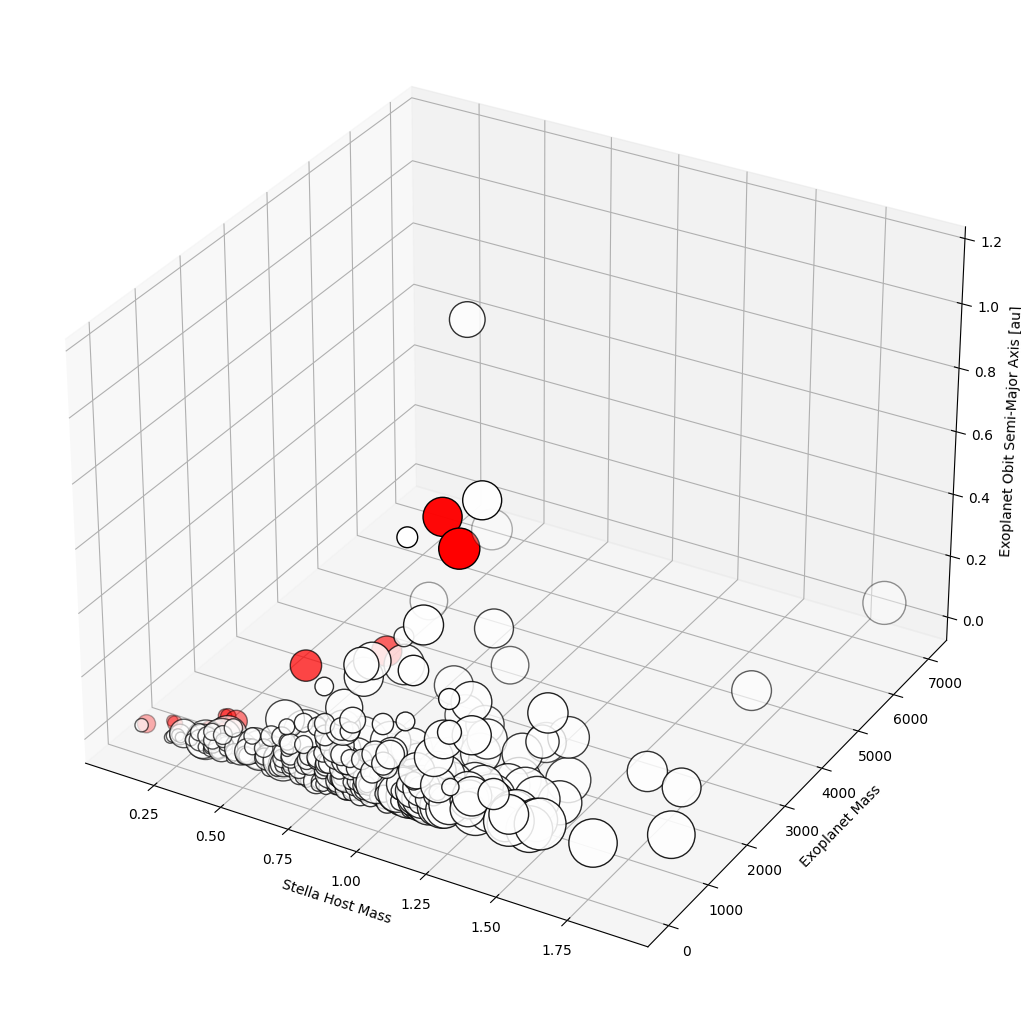

In [342]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(projection='3d')

plot_exoplanets_3d(ax=ax,
                   exoplanets_data=exoplanets_data,
                   x_field='st_mass',
                   y_field='pl_bmasse',
                   z_field='pl_orbsmax',
                   size_field='pl_rade',
                   is_selected=exoplanets_data['pl_hz'].map(lambda x: x == 1),
                   marker='o',
                   color='red',
                   edgecolors='black',
                   scale_size=70)

plot_exoplanets_3d(ax=ax,
                   exoplanets_data=exoplanets_data,
                   x_field='st_mass',
                   y_field='pl_bmasse',
                   z_field='pl_orbsmax',
                   size_field='pl_rade',
                   is_selected=exoplanets_data['pl_hz'].map(lambda x: x == 0),
                   marker='o',
                   color='white',
                   edgecolors='black',
                   scale_size=70)

ax.set_xlabel('Stella Host Mass')
ax.set_ylabel('Exoplanet Mass')
ax.set_zlabel('Exoplanet Obit Semi-Major Axis [au]')

plt.show()

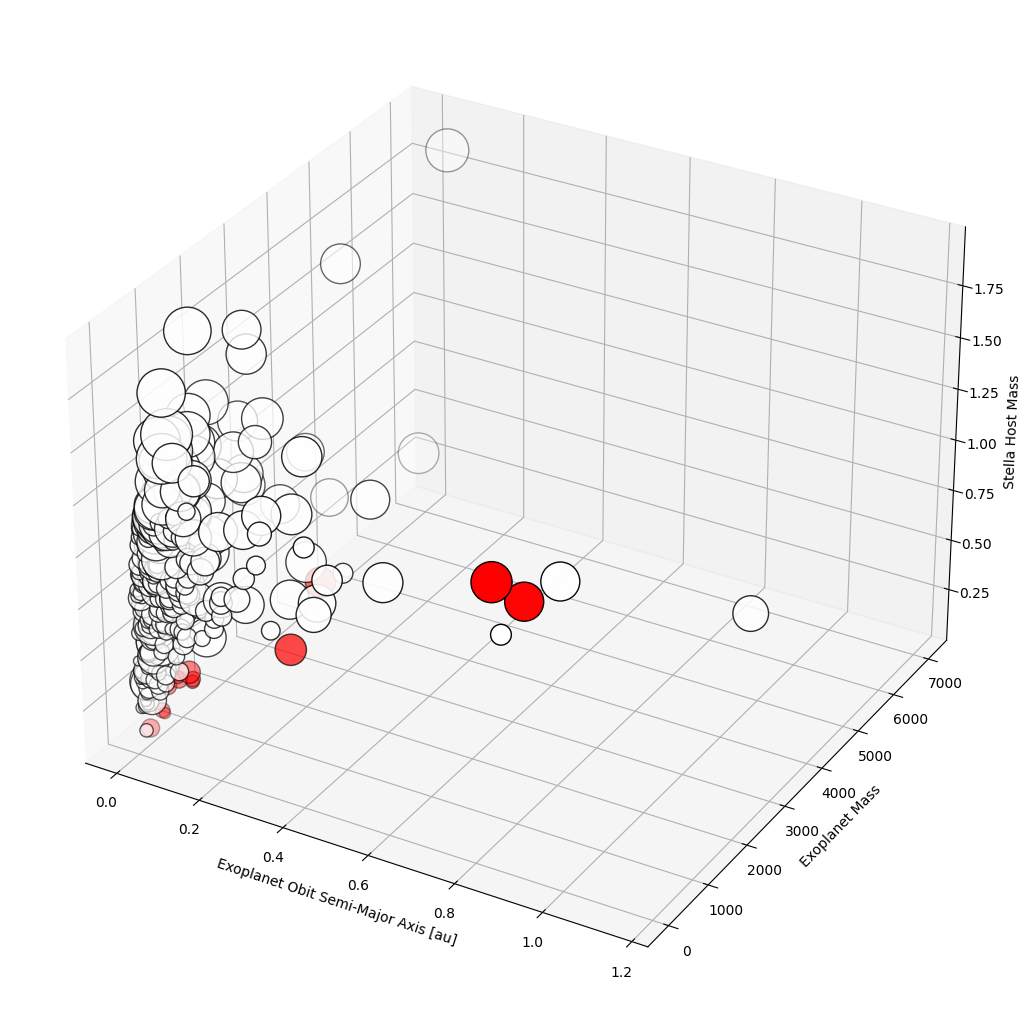

In [343]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(projection='3d')

plot_exoplanets_3d(ax=ax,
                   exoplanets_data=exoplanets_data,
                   x_field='pl_orbsmax',
                   y_field='pl_bmasse',
                   z_field='st_mass',
                   size_field='pl_rade',
                   is_selected=exoplanets_data['pl_hz'].map(lambda x: x == 1),
                   marker='o',
                   color='red',
                   edgecolors='black',
                   scale_size=70)

plot_exoplanets_3d(ax=ax,
                   exoplanets_data=exoplanets_data,
                   x_field='pl_orbsmax',
                   y_field='pl_bmasse',
                   z_field='st_mass',
                   size_field='pl_rade',
                   is_selected=exoplanets_data['pl_hz'].map(lambda x: x == 0),
                   marker='o',
                   color='white',
                   edgecolors='black',
                   scale_size=70)

ax.set_xlabel('Exoplanet Obit Semi-Major Axis [au]')
ax.set_ylabel('Exoplanet Mass')
ax.set_zlabel('Stella Host Mass')

plt.show()